# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from Tools.tools import rec
from Tools.tools import collection

### Collection 

In [2]:
#collection()

#### 1. Importer votre DataSet

In [3]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

##### Print

In [4]:
mydata

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,12.772568,-14.730925,3.879646,6.054199,10.596566,-3.472684,-1.719238,1.507617,6.584595,5.113246,-3.024158,-3.974193,0.0
1,12.431731,-18.472468,4.408776,1.175372,7.513962,-4.588528,-2.641852,8.210494,14.615780,7.060857,-1.446501,-0.630484,1.0
2,12.507834,-17.118474,5.735175,2.428662,9.680275,-1.858278,-0.638508,3.425208,6.045151,5.412117,-1.101276,-3.804069,2.0
3,12.829661,-17.083535,4.743584,2.887430,8.157131,-7.077747,-5.371912,4.081315,11.098929,8.807626,2.781226,-0.051805,3.0
4,12.516457,-19.597725,-6.279414,-0.611266,8.327901,-6.586270,2.053254,6.520193,4.266187,5.736765,3.128329,-1.100998,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.259651,-20.287960,-3.246255,-0.016112,6.970835,-5.094229,0.276182,3.415933,5.008451,5.258662,1.030869,0.607617,5.0
96,15.847307,-18.601339,-0.781043,12.350761,8.429542,-4.858392,9.493984,3.499498,2.015731,9.861658,4.557224,-0.143481,6.0
97,13.442088,-18.431734,-4.193404,4.675744,10.073600,-3.080338,5.906949,3.282121,0.947044,7.342508,5.206729,0.464542,7.0
98,13.989350,-11.641914,9.905593,7.219988,18.372218,6.797938,3.793682,3.106554,2.540935,3.978525,1.199410,-1.479304,8.0


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     100 non-null    float64
 1   Fe2     100 non-null    float64
 2   Fe3     100 non-null    float64
 3   Fe4     100 non-null    float64
 4   Fe5     100 non-null    float64
 5   Fe6     100 non-null    float64
 6   Fe7     100 non-null    float64
 7   Fe8     100 non-null    float64
 8   Fe9     100 non-null    float64
 9   Fe10    100 non-null    float64
 10  Fe11    100 non-null    float64
 11  Fe12    100 non-null    float64
 12  Target  100 non-null    float64
dtypes: float64(13)
memory usage: 10.3 KB


#### 3. Visualiser les targets

Text(0, 0.5, 'nombre de répétition')

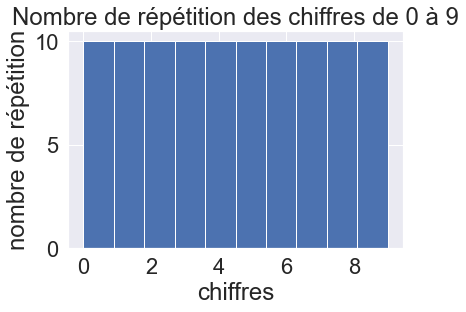

In [52]:
mydata.Target.hist()
plt.title("Nombre de répétition des chiffres de 0 à 9")
plt.xlabel("chiffres")
plt.ylabel("nombre de répétition")

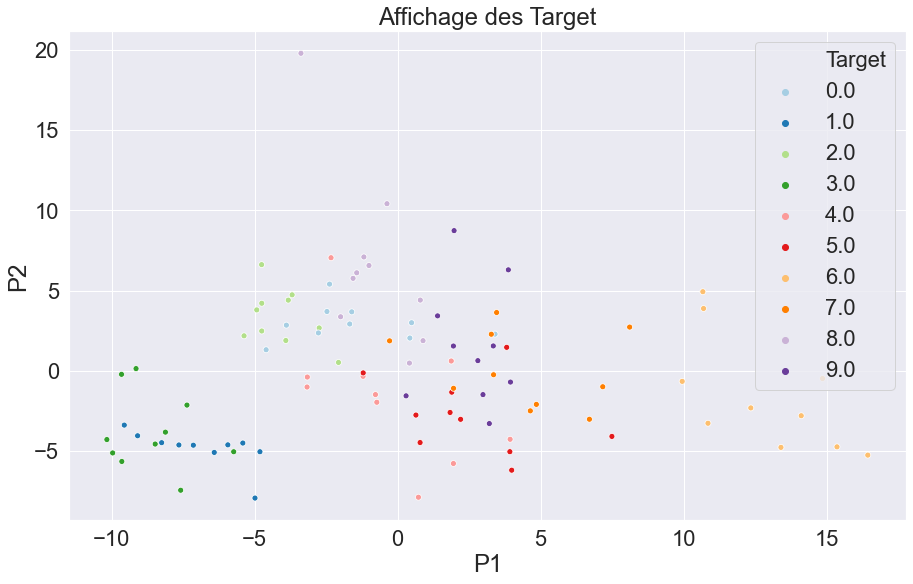

In [53]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df2 = pd.DataFrame(pca.fit_transform(mydata.iloc[:, :-1]))

df2["Target"] = mydata["Target"]
df2.columns = ["P1","P2","Target"]


plt.figure(1,figsize=(15,9))
plt.clf()
sns.scatterplot(x="P1",y="P2",hue="Target",data=df2, palette = "Paired")



#plt.plot(x,y,"+")

plt.xlabel('P1')
plt.ylabel('P2')
plt.title('Affichage des Target')
plt.show()

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [8]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(100, 12)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### 6. Développer votre meilleur modèle de classification (pipeline + gridsearch)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
models_name = ["Support Vector Machine", "Arbre de Décision", "Random Forest", "Gradient bosting", "KNN", "XGBoost", "MLP"]

pipe = [Pipeline([('scaler', StandardScaler()), ('svc', SVC())]),
        Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('RFC', RandomForestClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('boost', GradientBoostingClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('XGB', XGBClassifier())]),
        Pipeline([('scaler', StandardScaler()), ('MLP', MLPClassifier())])]

paramaters = [{'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid', 'precomputed'], 'svc__C' : [1, 10]},
              {'tree__random_state': [0, 1, 2, 3, 4]},
              {'RFC__max_depth' : [4, 5, 6, 7, 8, 9, 10], 'RFC__random_state': [0, 1, 2, 3, 4]},
              {'boost__loss' : ['deviance', 'boost__exponential'], 'boost__learning_rate' : [0.1, 0.2, 0.3], 'boost__n_estimators': [100, 150, 200], 'boost__random_state': [0, 1, 2, 3, 4]},
              {'KNN__n_neighbors': [1, 2, 3, 4, 5, 6], 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['euclidean', 'manhattan', 'minkowski']},
              {'XGB__eta' : [0.1, 0.2, 0.3, 0.4], 'XGB__max_depth' : [2, 4, 6, 8, 10], 'XGB__eval_metric' : ['mlogloss']},
              {'MLP__hidden_layer_sizes' : [(50,), (100,), (150,)], 'MLP__activation' : ['identity', 'logistic', 'tanh', 'relu'], 'MLP__random_state': [0, 1, 2, 3, 4]}
             ]


In [13]:
Predictions = {}
Best = []
for p, name, param in zip(pipe, models_name, paramaters):
    # p.fit(X_train, y_train)
    #y_pred = p.predict(X_test)
    exp = GridSearchCV(p, param_grid = param, cv = 5, scoring = "accuracy")
    exp.fit(X_train, y_train)
    Predictions[name] = exp.predict(X_test)
    Best.append(exp)
    print(f"Score ({name}) : {exp.score(X_test, y_test).round(4)*100}% \nMeilleurs paramètres : {exp.best_params_}")
    print("\n ===================================================================== \n")

Score (Support Vector Machine) : 85.0% 
Meilleurs paramètres : {'svc__C': 1, 'svc__kernel': 'linear'}


Score (Arbre de Décision) : 60.0% 
Meilleurs paramètres : {'tree__random_state': 0}


Score (Random Forest) : 95.0% 
Meilleurs paramètres : {'RFC__max_depth': 10, 'RFC__random_state': 4}


Score (Gradient bosting) : 75.0% 
Meilleurs paramètres : {'boost__learning_rate': 0.3, 'boost__loss': 'deviance', 'boost__n_estimators': 100, 'boost__random_state': 1}


Score (KNN) : 95.0% 
Meilleurs paramètres : {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1, 'KNN__weights': 'uniform'}


Score (XGBoost) : 85.0% 
Meilleurs paramètres : {'XGB__eta': 0.3, 'XGB__eval_metric': 'mlogloss', 'XGB__max_depth': 4}


Score (MLP) : 95.0% 
Meilleurs paramètres : {'MLP__activation': 'tanh', 'MLP__hidden_layer_sizes': (50,), 'MLP__random_state': 4}




In [14]:
from joblib import dump, load

dump(Best[2].best_estimator_, 'model.joblib')

scaler = StandardScaler().fit(X_train)
dump(scaler, 'scaler.joblib')

['scaler.joblib']

# Application en Temps Réel

In [15]:
from Tools.tools import rec
from Tools.tools import collection

In [16]:
rec()

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 
------------------
Digit :  8.0
------------------


### Affichage de la corrélation des Features

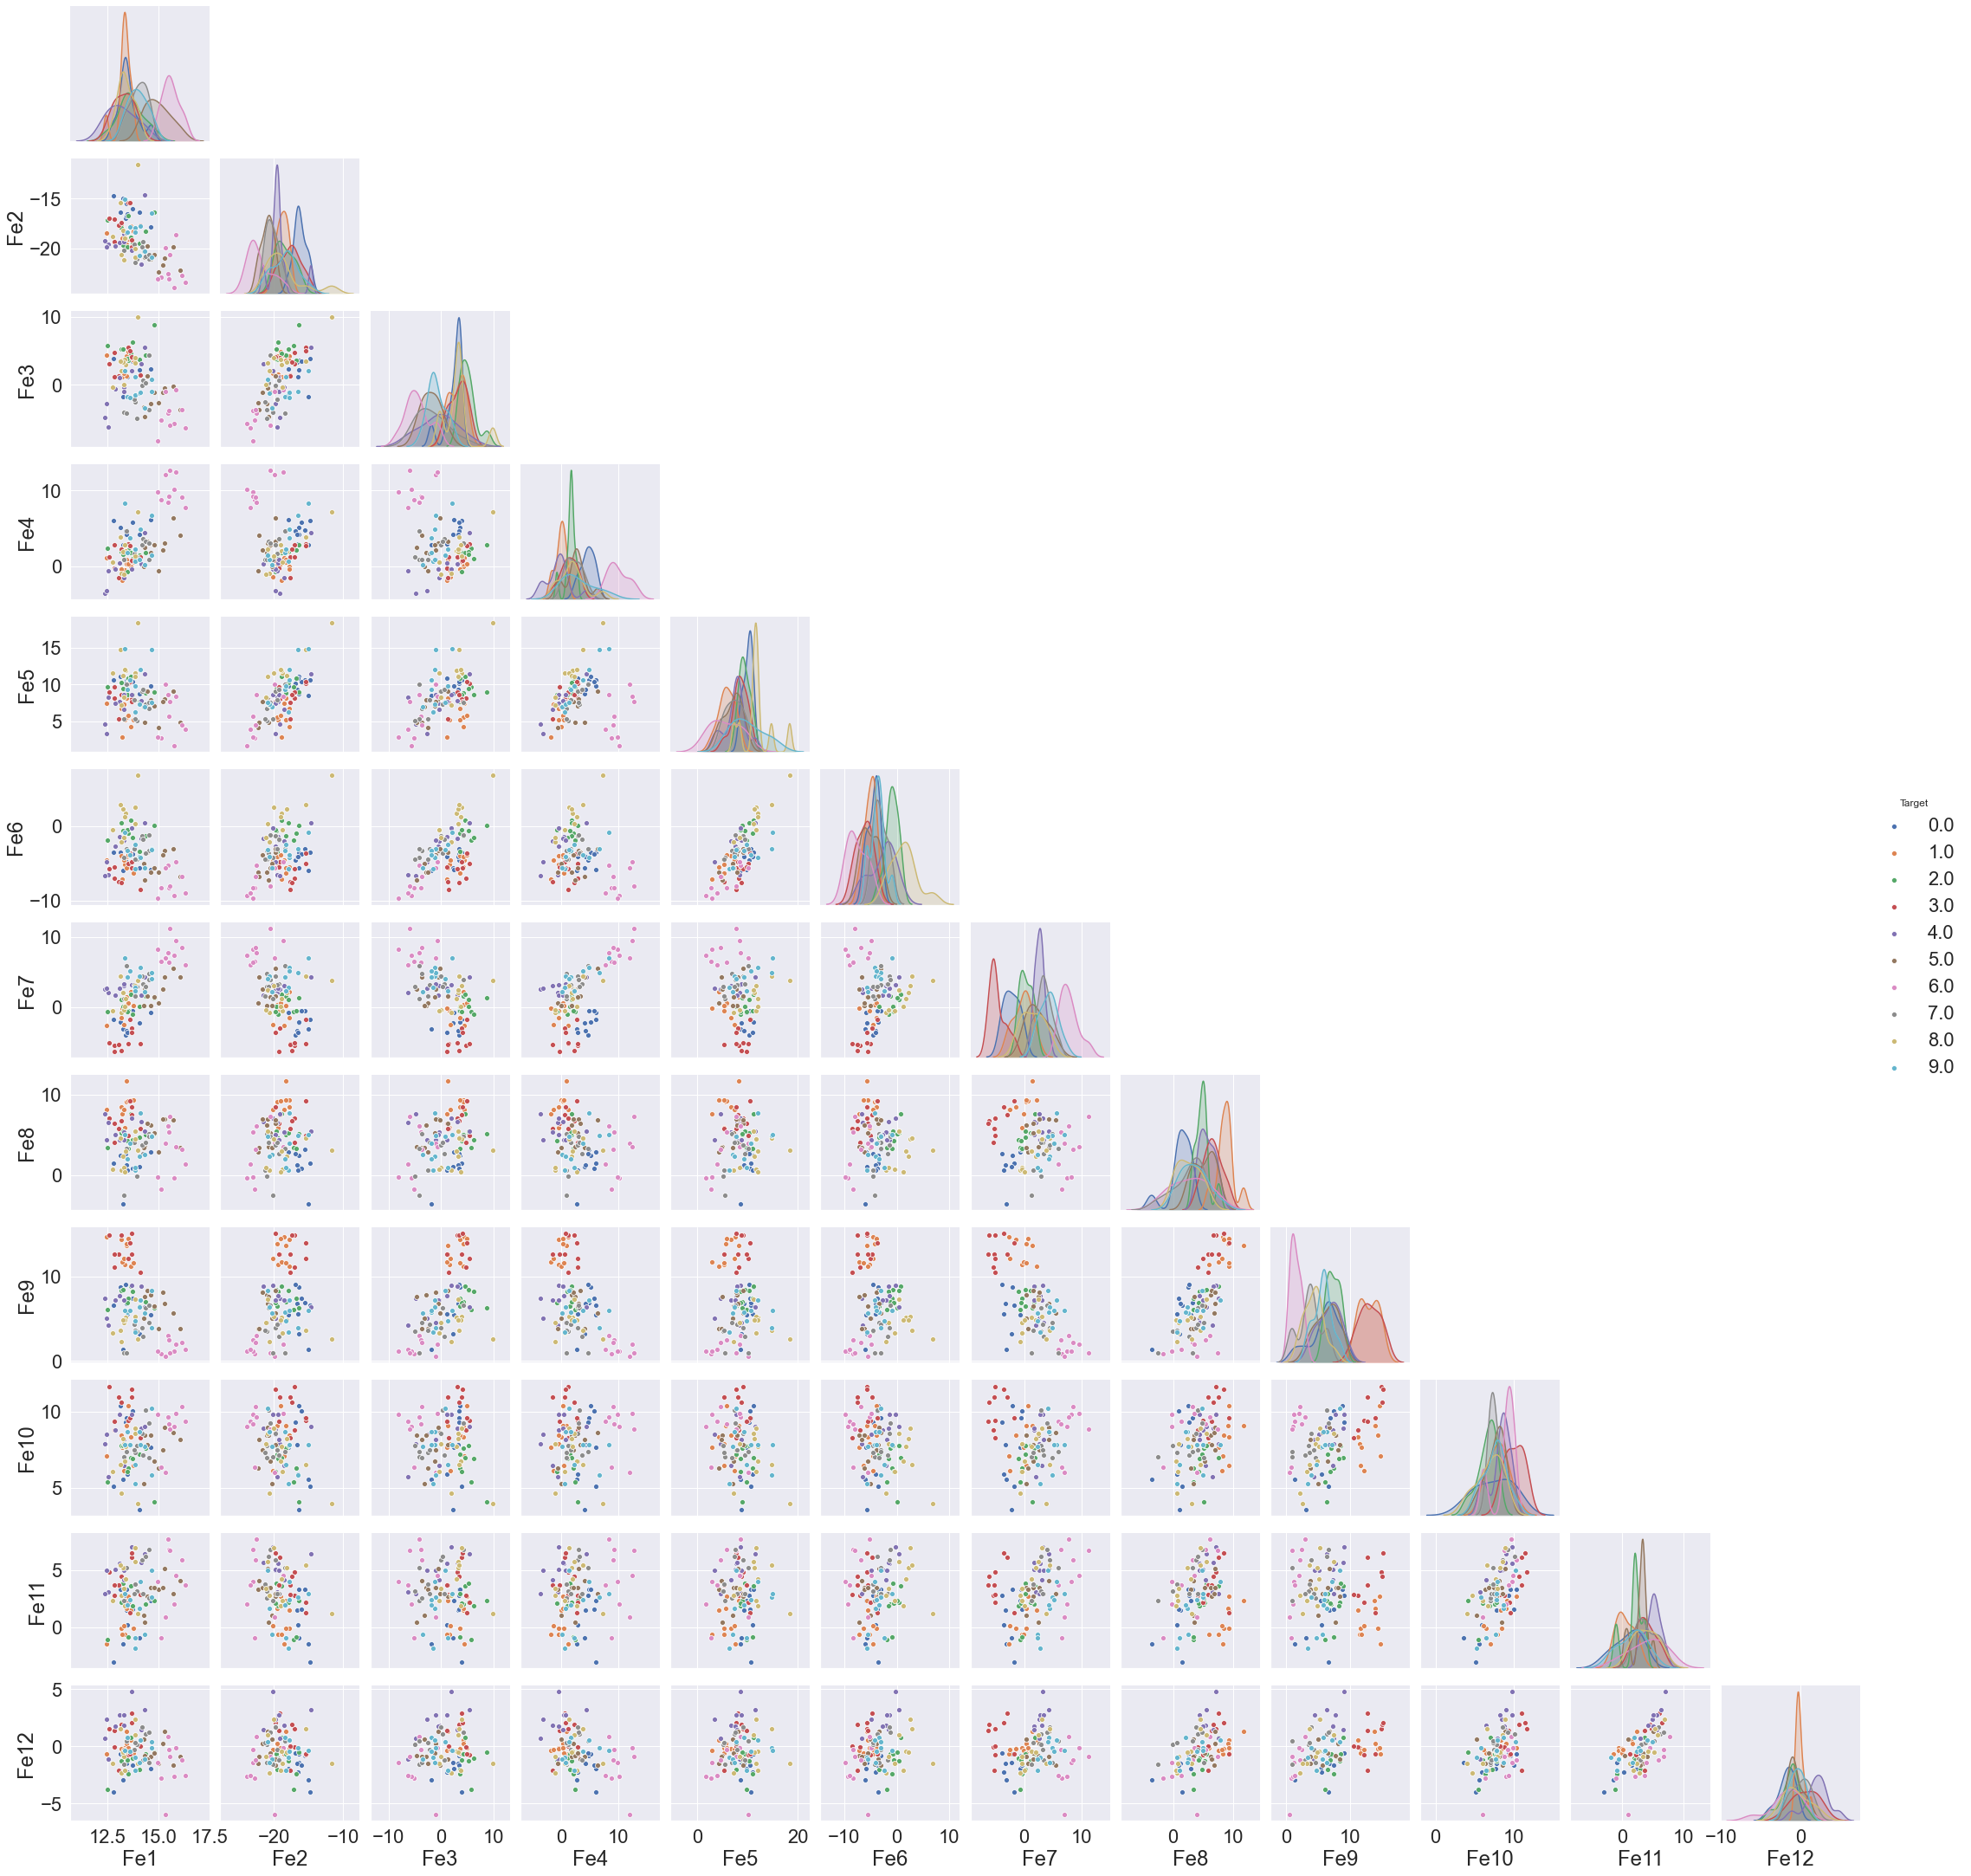

In [24]:
sb.pairplot(mydata, hue= "Target", corner=True)

### Récupération des Target 3 et 6

In [46]:
# on prend le 3 et le 6
data = []
for i in range(len(mydata)):
    if mydata.loc[i,"Target"] == 3.0 or mydata.loc[i,"Target"] == 6.0:
        data.append(mydata.loc[i,:])

In [48]:
df = pd.DataFrame(data)

In [50]:
df.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
3,12.829661,-17.083535,4.743584,2.887430,8.157131,-7.077747,-5.371912,4.081315,11.098929,8.807626,2.781226,-0.051805,3.0
6,15.132264,-22.832238,-5.215221,8.742676,2.771526,-8.279943,6.542808,-1.699308,0.841254,6.323128,-0.930051,-2.805404,6.0
13,14.117512,-17.691483,1.384150,1.251274,7.626376,-8.534145,-5.137399,5.804273,10.506929,8.247705,2.888639,0.004735,3.0
16,15.745202,-23.898234,-5.753879,10.097140,1.694773,-9.332476,7.389405,-0.283088,1.109301,9.002157,2.045568,-2.621303,6.0
23,13.059657,-17.626650,1.263714,-1.521470,5.317392,-7.542836,-5.263489,5.772371,12.608026,10.947731,3.672263,-2.094745,3.0


### Affichage de la corrélation des Features en fonction du df de 3 et 6

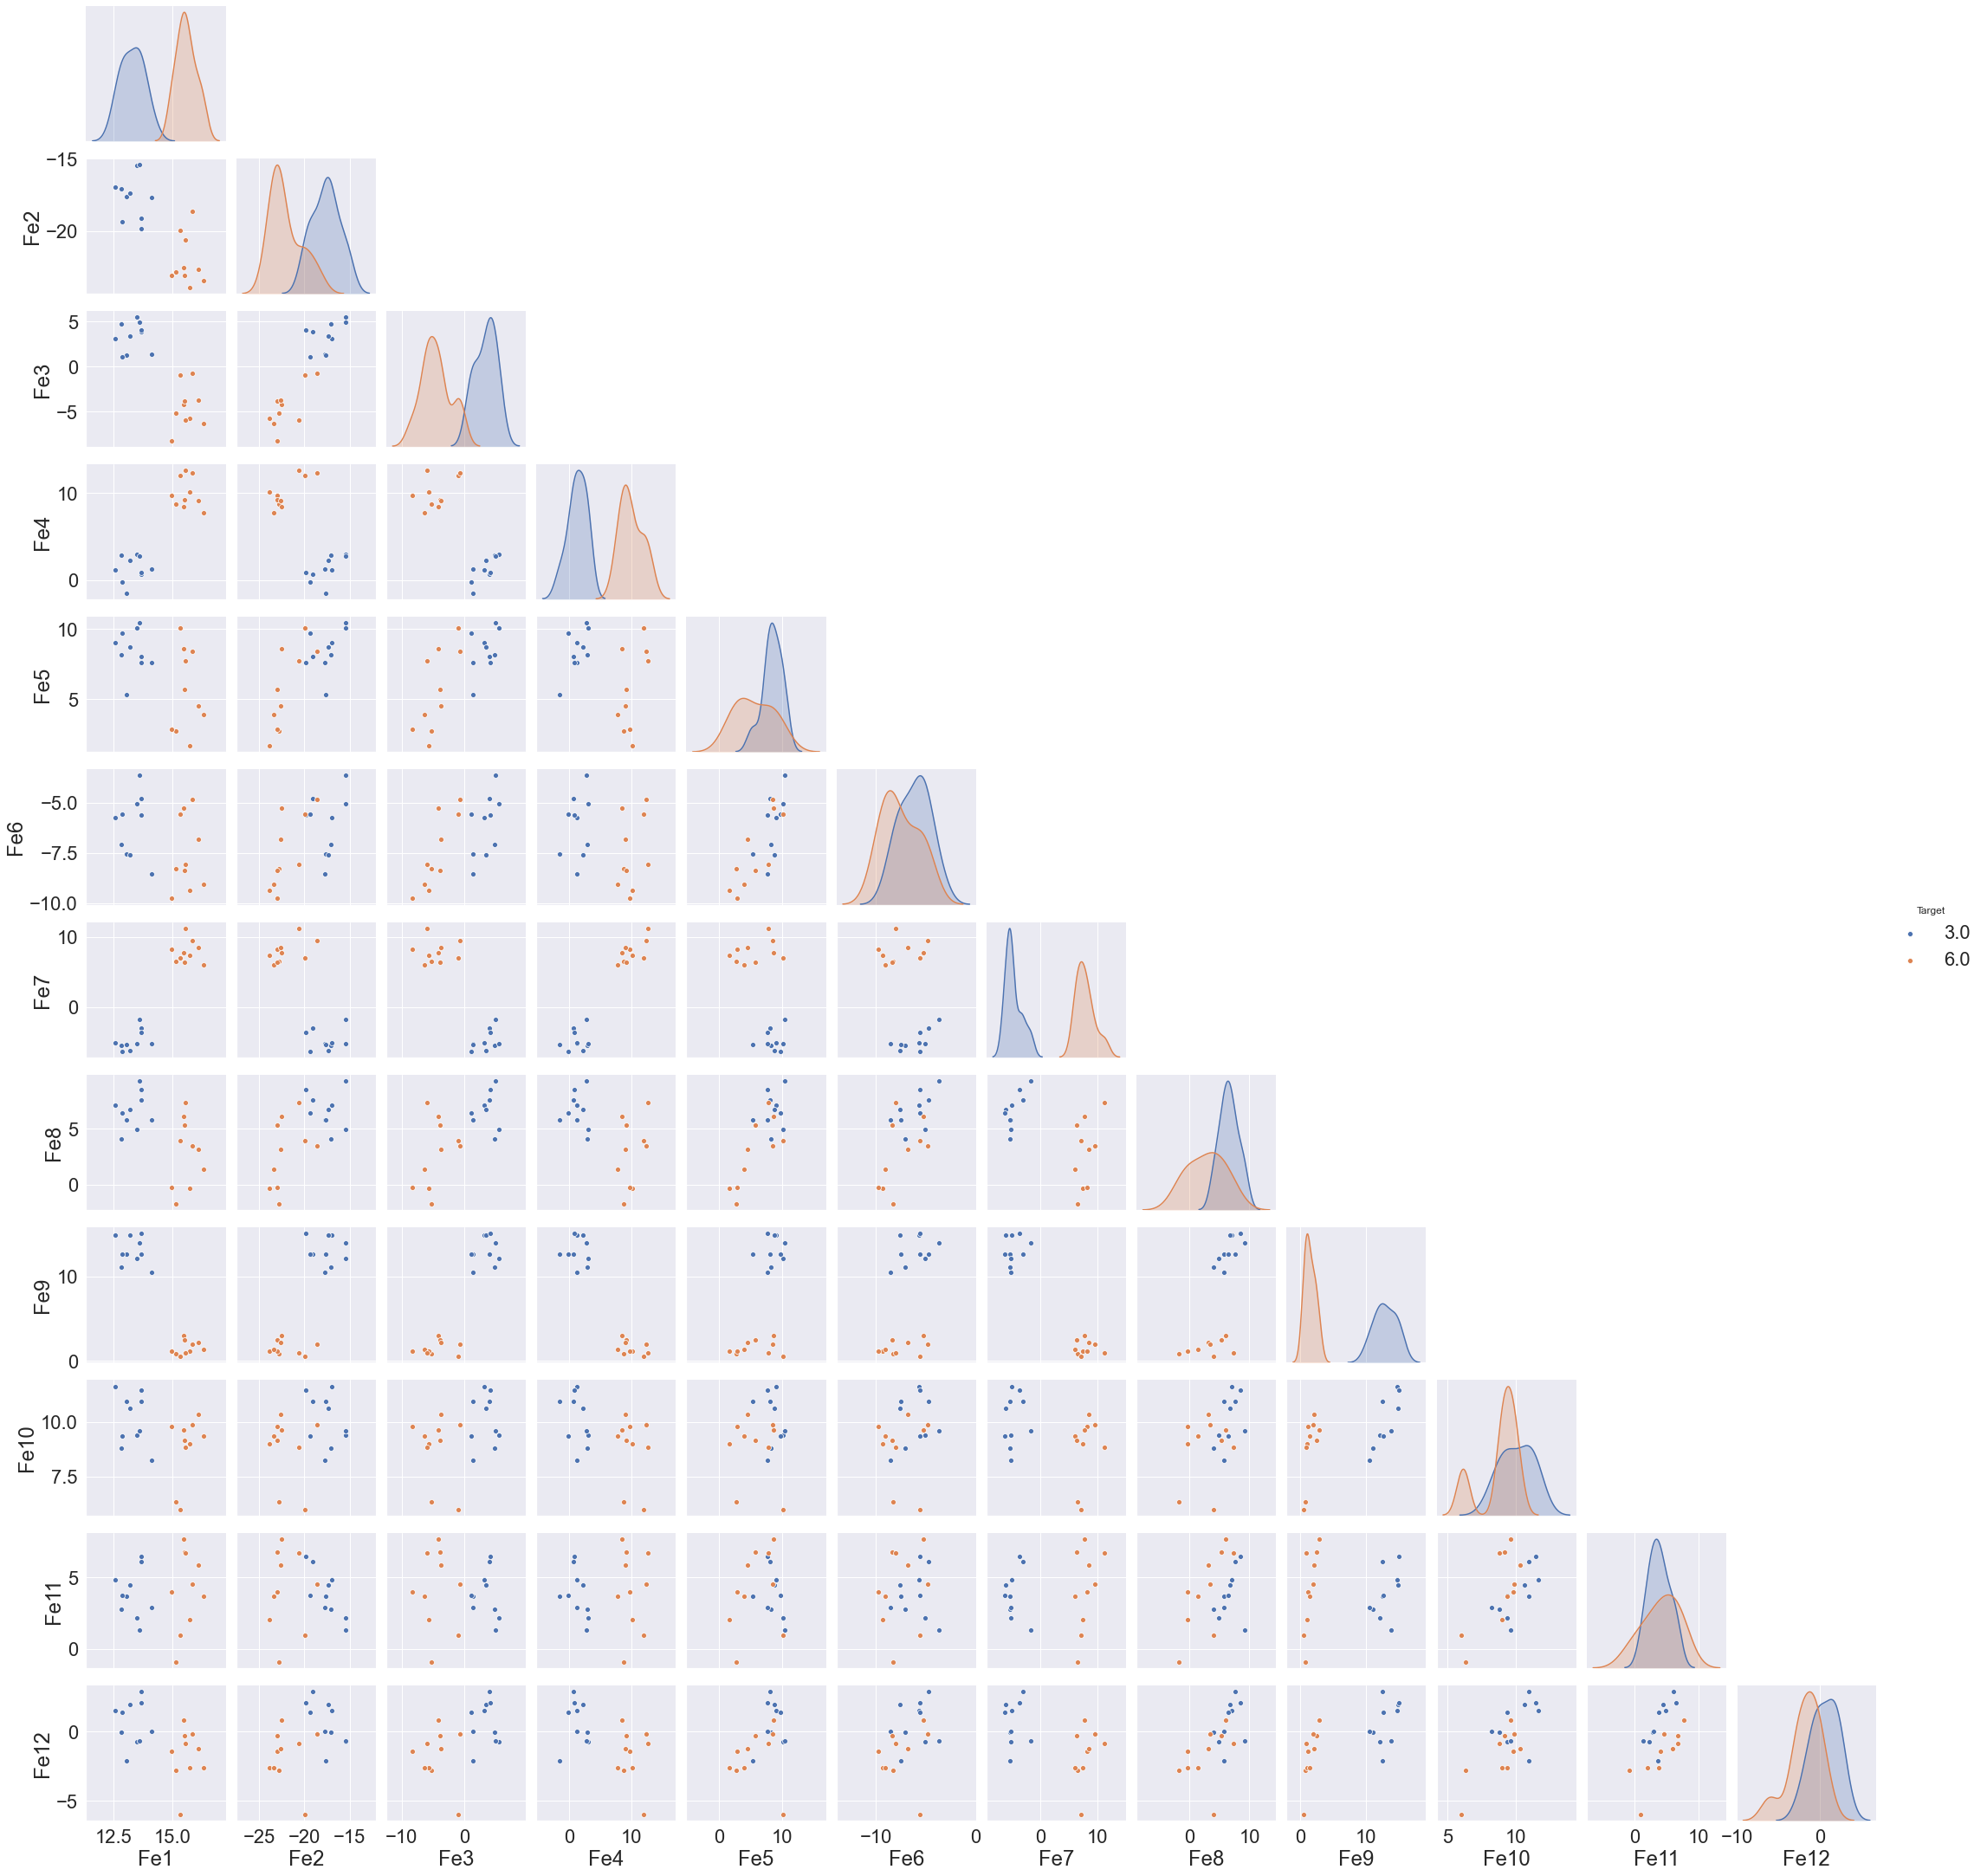

In [51]:
sb.pairplot(df, hue= "Target", corner=True)